<a href="https://colab.research.google.com/github/Manasa-01/cs666student/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

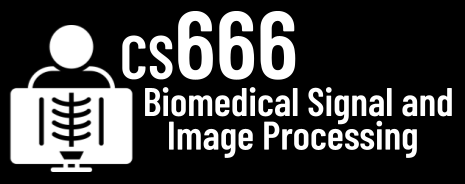
#Assignment 4

In [ ]:
# NAME: Manasa Kone

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [9]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 1:** Download, extract, and load the data! [15 Points]

In [14]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [17]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [18]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [19]:
# TODO: Please display this image and print the dimensions!

In [20]:
# TODO: YOUR CODE

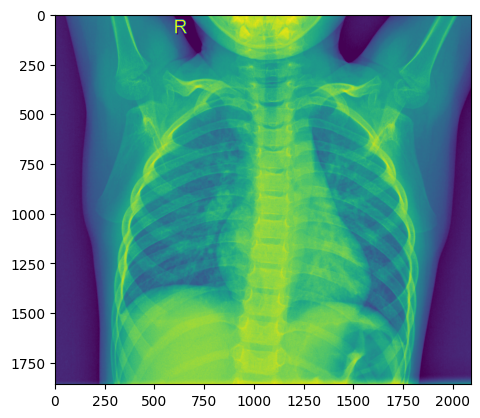

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [24]:
imgshape = shape(img)
print("Dimensions of the image : ", imgshape)

Dimensions of the image :  (1858, 2090)


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [23]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [25]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER
# TODO: Operation 3) YOUR ANSWER

operation 1 - uses a loop to read the image files from folders list (normal, pneumonia, covid)

operation 2 - using imresize() function from the mahotas library it resizes each image to a fixed size of 300x300 pixels.

operation 3 - stores the resized images in 3d array called 'data'.
first dimension = folder index
second dimension = image index
third dimension = pixel values of resized image.


In [26]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [27]:
# TODO: YOUR CODE

Text(0.5, 1.0, 'Pneumonia')

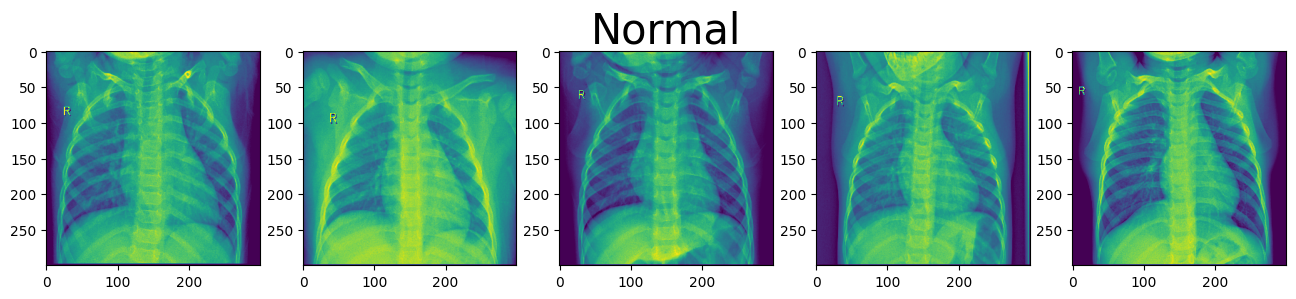

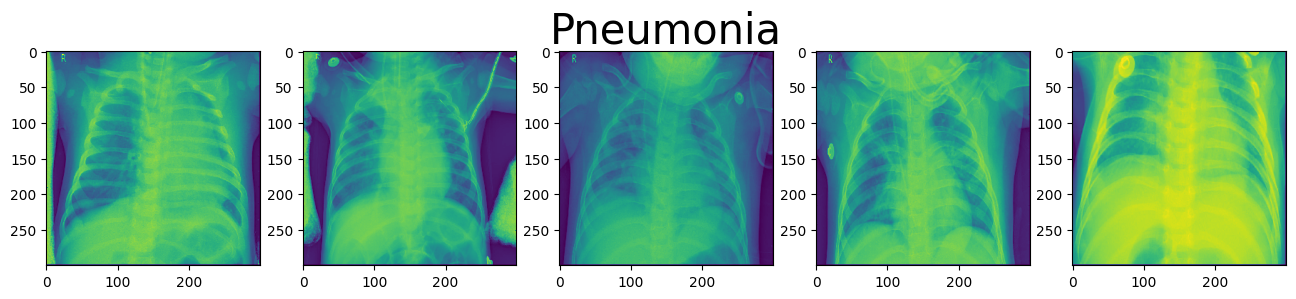

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#first 5 normal_images
f, axarr = plt.subplots(1,5, figsize=(16, 6))
n_slice = [] 
for i in range(5):
    image = data[0][i]
    n_slice.append(image)

for i in range(5):
  axarr[i].imshow(n_slice[i])

axarr[2].set_title('Normal', fontsize=30)

#first 5 pneumonia_images
f, axarr = plt.subplots(1,5, figsize=(16, 6))
p_slice = [] 
for i in range(5):
    image = data[1][i]
    p_slice.append(image)

for i in range(5):
  axarr[i].imshow(p_slice[i])

axarr[2].set_title('Pneumonia', fontsize=30)

**Task 3:** Setup training and testing data. [15 Points]

In [30]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [31]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [37]:
X_train

array([[0.16862746, 0.15686275, 0.19215687, ..., 0.        , 0.        ,
        0.        ],
       [0.09019608, 0.07450981, 0.09019608, ..., 0.        , 0.        ,
        0.        ],
       [0.03921569, 0.07058824, 0.09803922, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.01062745, 0.00117647, 0.00278431, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [36]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.concatenate([np.zeros(TRAINING_COUNT), np.ones(TRAINING_COUNT), np.full(TRAINING_COUNT, 2)])
y_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [38]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [40]:
X_test

array([[ 1.6862746e-01,  1.5686275e-01,  1.9215687e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.0196081e-02,  7.4509807e-02,  9.0196081e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.9215688e-02,  7.0588239e-02,  9.8039217e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 9.9607843e-01,  4.6666667e-01,  4.4313726e-01, ...,
         9.9607843e-01,  1.0000000e+00,  0.0000000e+00],
       [-1.7415264e-17, -3.4830527e-17,  3.9215689e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 7.2156864e-01,  7.0588237e-01,  6.9803923e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [41]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test = np.concatenate([np.zeros(TESTING_COUNT), np.ones(TESTING_COUNT), np.full(TESTING_COUNT, 2)])


In [42]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [43]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [44]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [45]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [46]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [47]:
# TODO: YOUR ANSWER

Random Forest is a machine learning classifier.
To develop an accurate model, multiple decision trees are trained independently using training data and features, and their predictions are combined to develop the final prediction.

In [51]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [52]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [53]:
# TODO: YOUR ANSWER

The classification accuracy is good.
Despite the loss of information from resizing, it's unusual and  surprising that the model is performing well.

**Bonus:** Let's take a closer look! [33 Points]

In [54]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [55]:
# TODO: YOUR CODE AND YOUR ANSWER

In [56]:
covid_testCount = 99 
X_c = np.zeros( (covid_testCount, 300*300 ), dtype=np.float32)
t_pos_C = 0

for image in data[2][100:]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_c[t_pos_C] = image
    t_pos_C += 1

y_c = np.full(covid_testCount, 2)

clf.score( X_c, y_c )


0.9595959595959596

In [57]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(X_test_covid_only) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

Misclassified images: [5, 15, 27, 84]


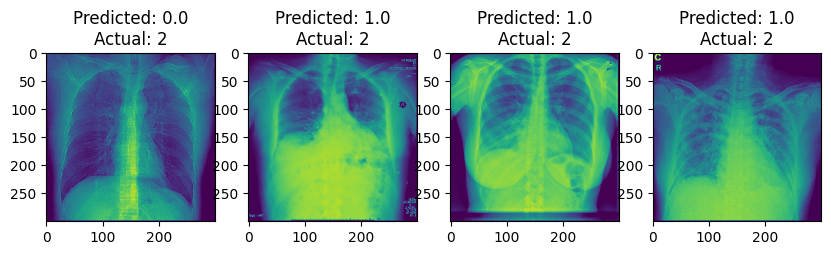

In [58]:
# Get predictions for the remaining 99 covid images
predictions = clf.predict(X_c)

misclassified_images = []
for i in range(len(predictions)):
  if predictions[i] != y_c[i]:
    misclassified_images.append(i)
print("Misclassified images:", misclassified_images)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(misclassified_images), figsize=(10,10))
for i, index in enumerate(misclassified_images):
  img = data[2][100:][index]
  axes[i].imshow(img)
  axes[i].set_title("Predicted: " + str(predictions[index]) + "\nActual: " + str(y_c[index]))


plt.show()


The misclassification may be due to a small dataset, poor quality images-The misclassification may be due to a small dataset, poor quality images, or similarity between COVID-19 and other respiratory diseases, or similarity between COVID-19 and other respiratory diseases.

In [59]:
#citations: 
# https://matplotlib.org/stable/index.html
# StackOverflow
# collaborated with dathrika13

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw